# Linear Regression with Python

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
import statsmodels.api as sm
%matplotlib inline

In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
Th

### Check out the Data

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
USAhousing.info()

In [ ]:
USAhousing.describe()

In [ ]:
USAhousing.columns

# EDA

Let's create some simple plots to check out the data!

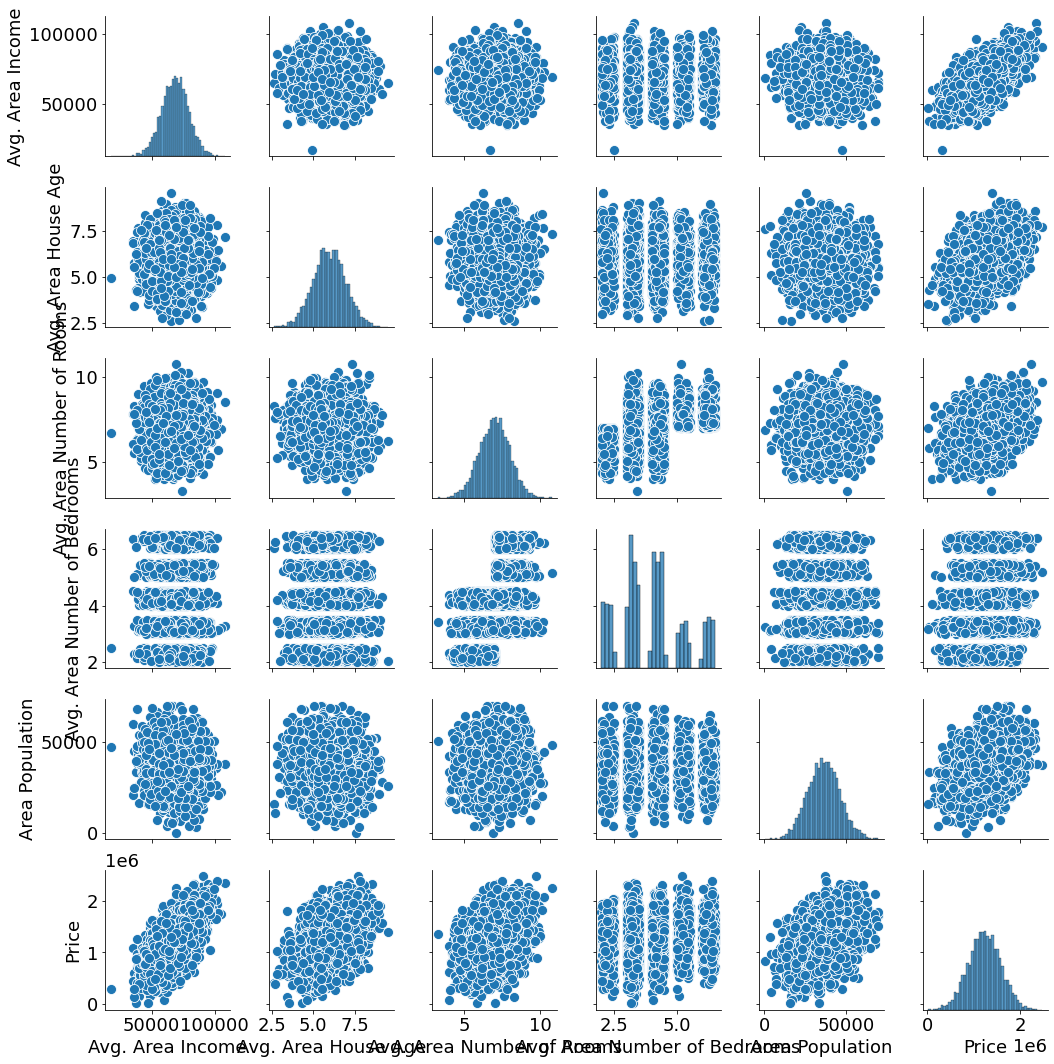

In [41]:
sns.pairplot(USAhousing)

In [ ]:
sns.distplot(USAhousing['Price'])

In [ ]:
sns.heatmap(USAhousing.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

### Simple Linear Regression

In [ ]:
X = pd.DataFrame(USAhousing['Avg. Area Income'])
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Coefficient of determination** (R^2) is known as coefficient of determination. 

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **Coefficient of determination** greater is better (Close to 1).
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [ ]:
from sklearn import metrics

In [ ]:
print('R^2:',lm.score(X_train,y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### Multiple Linear Regression

In [4]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

**Residual Histogram**

In [ ]:
sns.distplot((y_test-predictions),bins=50,color='g');

In [ ]:
from sklearn import metrics

In [ ]:
print('R^2:',lm.score(X_train,y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Subset Selection in MLR

In [16]:
def processSubset(feature_set):  #col names
    
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])     
    regr = model.fit()
    Rsq = regr.rsquared
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS, 'Rsq': Rsq}

In [12]:
list(itertools.combinations(X.columns, 5))

[('Avg. Area Income',
  'Avg. Area House Age',
  'Avg. Area Number of Rooms',
  'Avg. Area Number of Bedrooms',
  'Area Population')]

In [17]:
def getBest(k):
    tic = time.time()   #to measure time for running the code
    results = []
    for cnations(X.columns, k):
        results.apombo in itertools.combipend(processSubset(combo))
        # Wrap everything up in a nice dataframe
        models = pd.DataFrame(results)
        # Choose the model with the highest RSS
        best_model = models.loc[models['RSS'].argmin()]
        toc = time.time()
        print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
        # Return the best model, along with some other useful information about the model
        return best_model

In [18]:
models = pd.DataFrame(columns=['Rsq', "RSS", "model"])
tic = time.time()
for i in range(1,6):
    models.loc[i] = getBest(i)
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 1 predictors in 0.00800633430480957 seconds.
Total elapsed time: 0.015145063400268555 seconds.
Processed  1 models on 2 predictors in 0.007978200912475586 seconds.
Total elapsed time: 0.028636932373046875 seconds.
Processed  1 models on 3 predictors in 0.009050130844116211 seconds.
Total elapsed time: 0.04367232322692871 seconds.
Processed  1 models on 4 predictors in 0.014772653579711914 seconds.
Total elapsed time: 0.06875801086425781 seconds.
Processed  1 models on 5 predictors in 0.013025045394897461 seconds.
Total elapsed time: 0.0919809341430664 seconds.


In [19]:
models

,Rsq,RSS,model
1,0.954462,3.740173e+14,<statsmodels.regression.linear_model.Regressio...
2,0.959879,3.295267e+14,<statsmodels.regression.linear_model.Regressio...
3,0.959973,3.287577e+14,<statsmodels.regression.linear_model.Regressio...
4,0.959975,3.287407e+14,<statsmodels.regression.linear_model.Regressio...
5,0.964345,2.928429e+14,<statsmodels.regression.linear_model.Regressio...


In [25]:
print(models.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.702e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):                        0.00
Time:                        10:38:24   Log-Likelihood:                         -69078.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4995   BIC:                                  1.382e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [24]:
print(getBest(2)["model"].summary())

Processed  1 models on 2 predictors in 0.013495445251464844 seconds.
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          5.979e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):                        0.00
Time:                        10:37:48   Log-Likelihood:                         -69373.
No. Observations:                5000   AIC:                                  1.388e+05
Df Residuals:                    4998   BIC:                                  1.388e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          

In [27]:
models.loc[2, "model"].rsquared

0.9598791435051546

Text(0, 0.5, 'BIC')

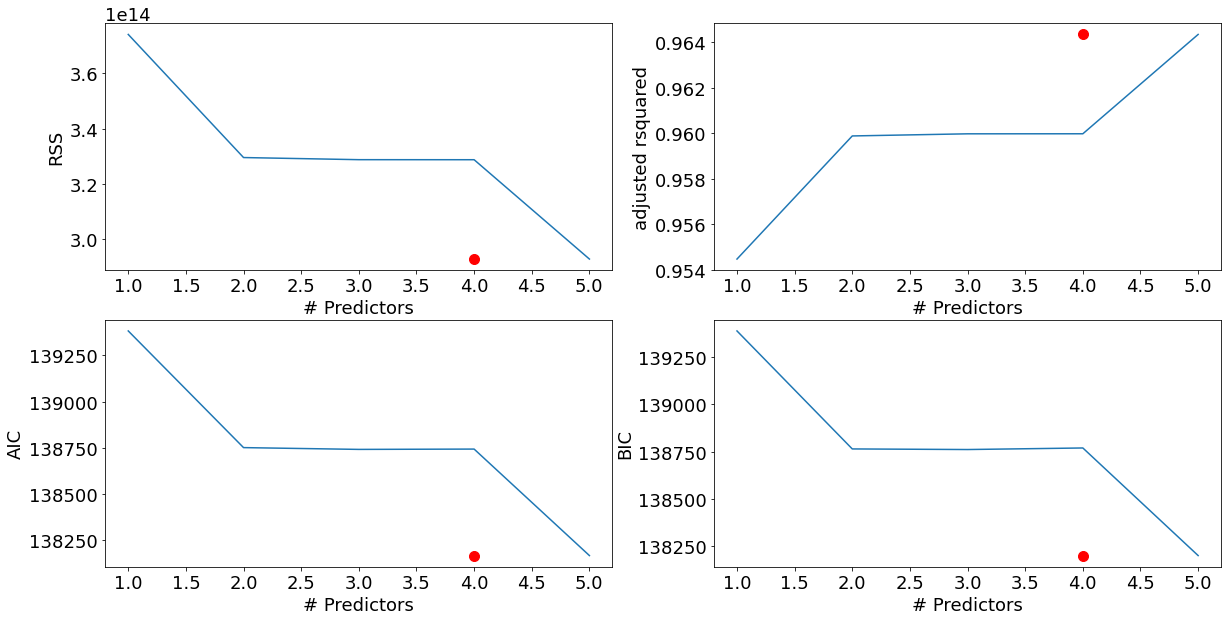

In [29]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)
# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models["RSS"])
plt.plot(models["RSS"].argmin(), models["RSS"].min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')
           
# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = models.apply(lambda row: row[2].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared)
plt.plot(rsquared.argmax(), rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')
           
# We’ll do the same for AIC and BIC, this time looking for the models with the SMALLEST statist
aic = models.apply(lambda row: row[2].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = models.apply(lambda row: row[2].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [32]:
#predictors =['Avg. Area Income', 'Area Population']
#[p for p in X.columns if p not in predictors]

# Forward and Backward Stepwise Selection

In [33]:
def forward(predictors):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
        # Wrap everything up in a nice dataframe
        models = pd.DataFrame(results)
        # Choose the model with the highest RSS
        best_model = models.loc[models['RSS'].argmin()]
        toc = time.time()
        print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
        # Return the best model, along with some other useful information about the model
        return best_model

In [34]:
models2 = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []
for i in range(1,len(X.columns)+1):
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]["model"].model.exog_names
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 1 predictors in 0.013174772262573242 seconds.
Total elapsed time: 0.02215409278869629 seconds.
Processed  1 models on 2 predictors in 0.012909650802612305 seconds.
Total elapsed time: 0.04331159591674805 seconds.
Processed  1 models on 3 predictors in 0.01665663719177246 seconds.
Total elapsed time: 0.0691993236541748 seconds.
Processed  1 models on 4 predictors in 0.011860847473144531 seconds.
Total elapsed time: 0.08906149864196777 seconds.
Processed  1 models on 5 predictors in 0.014875650405883789 seconds.
Total elapsed time: 0.1124415397644043 seconds.


In [36]:
print(models.loc[1, "model"].summary())
print(models.loc[2, "model"].summary())
print(models.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          1.048e+05
Date:                Wed, 12 May 2021   Prob (F-statistic):                        0.00
Time:                        10:54:57   Log-Likelihood:                         -69690.
No. Observations:                5000   AIC:                                  1.394e+05
Df Residuals:                    4999   BIC:                                  1.394e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
print(models.loc[5, "model"].summary())
print(models2.loc[5, "model"].summary())

In [37]:
def backward(predictors):
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
        # Wrap everything up in a nice dataframe
        models = pd.DataFrame(results)
        # Choose the model with the highest RSS
        best_model = models.loc[models['RSS'].argmin()]
        toc = time.time()
        print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
        # Return the best model, along with some other useful information about the model
        return best_model

In [38]:
models3 = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))
tic = time.time()
predictors = X.columns
while(len(predictors) > 1):
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]["model"].model.exog_names
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 4 predictors in 0.010970115661621094 seconds.
Total elapsed time: 0.012665033340454102 seconds.
Processed  1 models on 3 predictors in 0.009020090103149414 seconds.
Total elapsed time: 0.023716449737548828 seconds.
Processed  1 models on 2 predictors in 0.009942054748535156 seconds.
Total elapsed time: 0.034656524658203125 seconds.
Processed  1 models on 1 predictors in 0.008184671401977539 seconds.
Total elapsed time: 0.04380011558532715 seconds.


In [39]:
print(models.loc[5, "model"].params)
print(models2.loc[4, "model"].params)
print(models3.loc[3, "model"].params)

Avg. Area Income                   10.237202
Avg. Area House Age             51296.068670
Avg. Area Number of Rooms       -9614.433348
Avg. Area Number of Bedrooms     4082.312867
Area Population                     8.091825
dtype: float64
Avg. Area Income                   11.586185
Avg. Area House Age             64546.188890
Avg. Area Number of Rooms        8712.229812
Avg. Area Number of Bedrooms     1685.617044
dtype: float64
Avg. Area Income                11.588924
Avg. Area House Age          64546.981325
Avg. Area Number of Rooms     9645.549189
dtype: float64


In [40]:
print(models.loc[5, "model"].summary())
print(models2.loc[4, "model"].summary())
print(models3.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.702e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):                        0.00
Time:                        11:00:09   Log-Likelihood:                         -69078.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4995   BIC:                                  1.382e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------